In [1]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import io
from sklearn import linear_model

In [2]:
url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
download = requests.get(url).content
data=pd.read_csv(io.StringIO(download.decode('utf-8')))
data['date']=pd.to_datetime(data['date'])
last_day=len(data)
y=data['cases']

In [3]:
data.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


### 1.觀察原始資料，發現第70天左右開始爆發，150天後增長更快

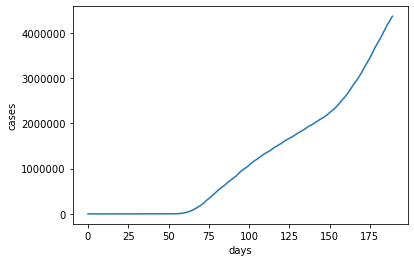

In [4]:
plt.plot(y)
plt.ylabel('cases')
plt.xlabel('days')
plt.show()

### 2.用最後30天的資料取log後做線性回歸，發現此模型可以fit原始資料，拿來預測後十天的增長

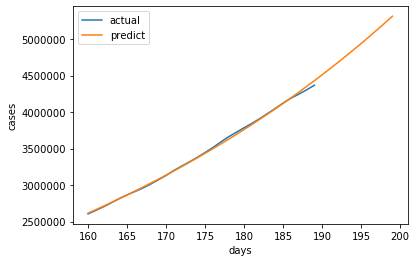

In [5]:
TRAIN_X=np.arange(last_day-30,last_day)[:,np.newaxis]
TRAIN_Y=np.log(y[last_day-30:last_day])
model = linear_model.LinearRegression()
model.fit(TRAIN_X,TRAIN_Y)

predict_x = np.arange(last_day-30, last_day+10)
predict_y = np.exp(model.predict(predict_x[:, np.newaxis]))

plt.plot(y[last_day-30:],label='actual')
plt.plot(predict_x, predict_y,label='predict');
plt.ylabel('cases')
plt.xlabel('days')
plt.legend()
plt.show()

In [6]:
print('每日增長',model.coef_[0],'%')

每日增長 0.018168590914038635 %


### 3.觀察後一日較前一日增長的比例，發現是成週期性波動

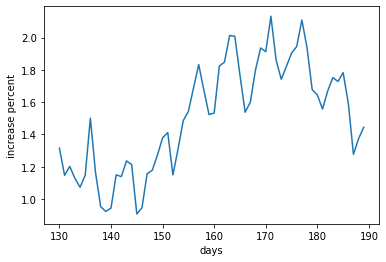

In [7]:
increase=(data['cases'].diff()/data['cases'])*100
plt.plot(increase[-60:])
plt.ylabel('increase percent')
plt.xlabel('days')
plt.show()

### 4.發現每周日新增確診人數的比例較其他日子少，若用更複雜的model將星期的資訊加入應該可以預測更準確

第131天= 2020-05-31 00:00:00


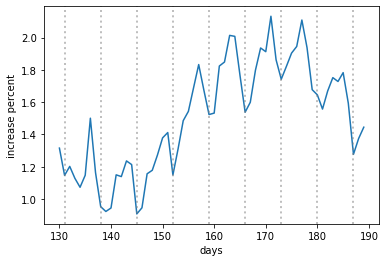

In [8]:
print("第131天=",data.iloc[131]['date'])
plt.plot(increase[-60:])
for i in range(131,194,7):
    plt.axvline(x=i,linewidth=2,ls=':',color='grey', alpha=0.5)
plt.ylabel('increase percent')
plt.xlabel('days')
plt.show()